# Calling the file and converting it to data(array)

In [1]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sci
from scipy import interpolate
from astropy.table import Table
t = Table.read('/home/parallels/NIUS/Temp/060.xml')
#print(t)
from astropy.io.votable import parse_single_table
table = parse_single_table('//home/parallels/NIUS/Temp/060.xml')
#print(table)
#%matplotlib notebook
data = table.array

# Giving some initial constants for the program

In [2]:
lambda_o = 5000  # # # This is the confusion. What are we supposed to take this lambda not.
inclination = (np.pi)/6         # in radian
c = sci.constants.c # speed of light
G = sci.constants.G        #gravitational constant
sigma = sci.constants.sigma     #stephen boltzmann constant

# Determining the truncation radius and plot of radius vs temp

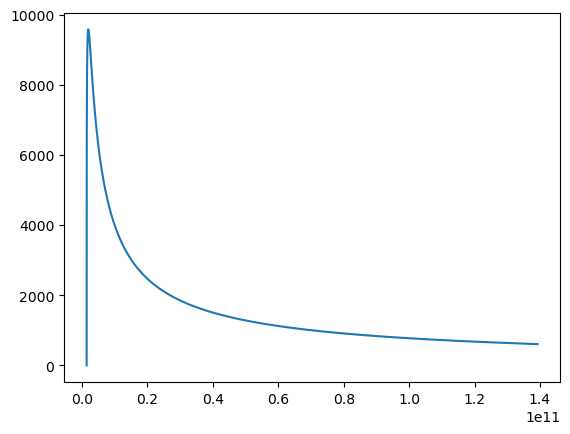

In [3]:
# R_in # inner truncation radius
# Refering Bovier paper
B_s = 1000 * (10**(-4))# in TESLA SI Unit
M_s = 0.6 * 1.9891 * (10**30) # twice of our sun in kg
M_dot_s = 3.8 * 10**(-5) * 1.9891 * (10**30) # accretion rate in units of mass of sun ##per year
M_dot_s = (3.8 * 10**(-5) * 1.9891 * (10**30))/(60*60*24*365.25) # in kg per sec
R_s = 2 * 696340 * 1000 # in metres

R_in_trunc = ((B_s)**(4/7) * (R_s)**(12/7))/((M_dot_s)**(2/7) * (2*G*M_s)**(1/7)) # in SI units
R_in_trunc = 3.5 * R_s
R_in_trunc = R_s
# Problem is reading the values in formula for R_trucation


# dont know why are the values so large????
radius = np.linspace(R_in_trunc, 100 * R_in_trunc, 10000)
tempp = ((3 * G * M_s * M_dot_s) / (8 * np.pi * sigma * ((radius) ** 3)) * (1 - ((R_in_trunc / radius) ** (1 / 2))))**0.25
plt.plot(radius,tempp)

# Trimming the radius and temp around temp of interest and determining R

In [4]:
# here we define a window of 100K where we want to find the average value of radius for a given input of temperature
radius_vs_temp = (radius,tempp)  # define an array of rad vs temp
t = int(input('Enter the value of temp: '))  # input the temp of interest
trimmed_temp = np.extract(tempp > t - 50,tempp)
trimmed_temp = np.extract(trimmed_temp < t + 50, trimmed_temp)
trimmed_temp # Window of interest in terms of temp
trimmed_radius = np.extract(tempp > t - 50, radius)
trimmed_radius = np.extract(trimmed_temp < t + 50, trimmed_radius)
trimmed_radius  # Window of interest in terms of radius
print('Total no of data points in temp range {} +/- 50 is {}'.format(t,len(trimmed_radius)))
print('Average value of radius that can be taken: {}'.format(sum(trimmed_radius)/len(trimmed_radius)))
R = sum(trimmed_radius)/len(trimmed_radius) # radius of accretion disk at that temperature

Enter the value of temp: 6000
Total no of data points in temp range 6000 +/- 50 is 10
Average value of radius that can be taken: 1482307920.7920794


In [5]:
print(R)# Radius
v_kep = (G*M_s/R)**0.5
print('v keplerian: ',v_kep)
np.sin(inclination)/(c) * v_kep
lambda_max = (lambda_o * np.sin(inclination))/(c) * v_kep
print('Lamba Max: ',lambda_max)
print('kernel width: {}'.format(lambda_max*2))

1482307920.7920794
v keplerian:  231812.88986340782
Lamba Max:  1.9331114215639122
kernel width: 3.8662228431278245


# Trimming the wavelength and flux from 3000-50000

In [6]:
#finding initial sampling rate of the data
trimmed_data = np.extract(data['WAVELENGTH']>3000,data)
trimmed_data = np.extract(trimmed_data['WAVELENGTH']<50000,trimmed_data)
print(trimmed_data[0],trimmed_data[-1])
# Sampling rate at Lambda not 
trim_dta = np.extract(trimmed_data['WAVELENGTH']>(lambda_o-lambda_max),trimmed_data)
trim_dta = np.extract(trim_dta['WAVELENGTH']<(lambda_o+lambda_max),trim_dta)
trim_dta
print('Sampling rate at lambda_0: ',len(trim_dta))
#sampling at initial lambda
trim_dta_2 = np.extract(trimmed_data['WAVELENGTH']<(trimmed_data['WAVELENGTH'][0]+(2*lambda_max)),trimmed_data)
#print(trim_dta_2)
print(len(trim_dta_2))
print('Initial Sampling rate at lambda_i: ',len(trim_dta_2))
#sampling at final lambda
trim_dta_3 = np.extract(trimmed_data['WAVELENGTH']>(trimmed_data['WAVELENGTH'][-1]-(2*lambda_max)),trimmed_data)
trim_dta_3
print('Initial Sampling rate at lambda_f: ',len(trim_dta_3))

(3000.030029296875, 447672.0) (49999.8984375, 15887.2998046875)
Sampling rate at lambda_0:  104
88
Initial Sampling rate at lambda_i:  88
Initial Sampling rate at lambda_f:  8


# Determining the difference between subsequent data points 

In [7]:
x_dash = trimmed_data['WAVELENGTH']
y_dash = trimmed_data['FLUX']
diff_in_wave = [0]
for i in range(len(x_dash)-1):
    diff_dash = x_dash[i+1]-x_dash[i]
    diff_in_wave.append(diff_dash)
#print(diff_wavelength_dash)
print(len(diff_in_wave))
#plt.plot(x_dash,np.log10(diff_wavelength_dash))
diff_in_wave[-1]
#here I see that the difference is not increasing linearly.
# We from ourselves define a new linspace such that the difference is linearly increasing
len(y_dash)
diff_in_wave

319113


[0,
 0.0,
 0.010009766,
 0.020019531,
 0.030029297,
 0.0,
 0.039794922,
 0.0,
 0.040039062,
 0.020019531,
 0.040039062,
 0.100097656,
 0.06982422,
 0.030029297,
 0.100097656,
 0.09008789,
 0.009765625,
 0.100097656,
 0.100097656,
 0.099853516,
 0.100097656,
 0.099853516,
 0.100097656,
 0.100097656,
 0.099853516,
 0.100097656,
 0.030029297,
 0.010009766,
 0.040039062,
 0.01977539,
 0.010009766,
 0.010009766,
 0.010009766,
 0.010009766,
 0.0,
 0.0,
 0.0,
 0.0,
 0.020019531,
 0.010009766,
 0.030029297,
 0.0,
 0.050048828,
 0.050048828,
 0.099853516,
 0.060058594,
 0.020019531,
 0.020019531,
 0.020019531,
 0.030029297,
 0.0,
 0.010009766,
 0.010009766,
 0.020019531,
 0.009765625,
 0.010009766,
 0.0,
 0.010009766,
 0.020019531,
 0.010009766,
 0.0,
 0.030029297,
 0.010009766,
 0.010009766,
 0.0,
 0.010009766,
 0.0,
 0.030029297,
 0.040039062,
 0.020019531,
 0.0,
 0.099853516,
 0.100097656,
 0.099853516,
 0.030029297,
 0.07006836,
 0.020019531,
 0.080078125,
 0.099853516,
 0.100097656,
 0.099

# Define a new linespace and calc the cumm sum

## Here we have to tune 2nd parameter in line 3 so that cf[-1] is close to 50000 but less


In [8]:
#define a new linspace
len(diff_in_wave)
new_difference = np.linspace(diff_in_wave[2],0.228053,420051) # the final value how to approach in proper method
#plt.plot(x,wave_dash)
#wave_dash
print(new_difference)
#cumsumm = [0]

'''for i in range(len(new_difference)):
    xx = new_difference[i] + cumsumm[-1]
    cumsumm.append(xx)'''
cf = np.cumsum(new_difference)
#print(cumsumm)
'''x_new = [3000]
for i in range(len(cf)-1):
    new_ele =  cf[i] - x_new[-1]
    x_new.append(new_ele)
len(x_new)
x_new[-1]'''
#new_x = np.linspace(3000,50000,420051)
#plt.plot(new_x,cf)
'''cf = []
for i in range(len(diff_in_wave)):
    cs = 3000 + cumsumm[i]
    cf.append(cs)
diff_in_wave[-3]'''
cf[-1]


[0.01000977 0.01001028 0.0100108  ... 0.22805196 0.22805248 0.228053  ]


49999.25138177346

# Defining the kernel and normalise

1482307920.7920794
4998.066888578436 5001.933111421564 100


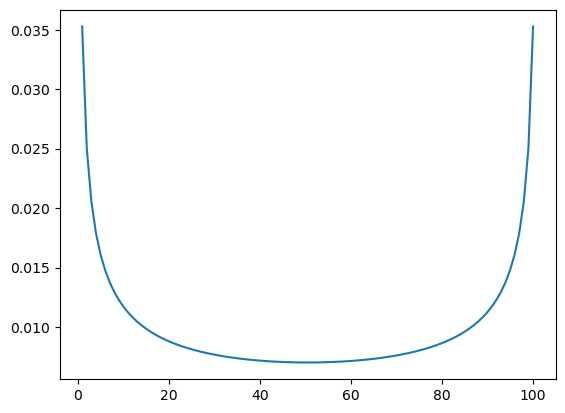

In [9]:
#NEW KERNEL #taking lambda not  == lambda not
print(R)# Radius

#Writing the kernel
#x_inter
para_1 = lambda_o-lambda_max
para_2 = lambda_o+lambda_max
para_3 = 100 #len(trim_dta_2)      #Forcefully increase the kernel size
print(para_1, para_2, para_3)
ax = np.linspace(para_1,para_2,para_3,False)
y_ker = (1-((ax-lambda_o)/lambda_max)**2)**(-0.5)
y_ker = np.ma.masked_invalid(y_ker)
y_ker = np.ma.filled(y_ker, 0)
ax=np.delete(ax,0)
y_ker=np.delete(y_ker,0)
#plt.plot(ax,y_ker,)
# y_ker.count()
w = np.count_nonzero(y_ker)
#print(y_ker[0])

# normalise the kernel
#Area calc
'''new_x
dx = (ax[-1]-ax[0])/len(ax)
print(dx)
elemental_area = []
for r in range(len(ax)):
    are = ax[r]*dx
    elemental_area.append(are)
total_area = sum(elemental_area)
total_area'''
final_kernel = y_ker / np.sum(y_ker)
len(final_kernel)
#final_kernel[0]
plt.plot(np.linspace(1,100,99),final_kernel)

# Interpolate the data and determine new_y as function of cf

420051
x_dash  [3000.030029296875 3000.030029296875 3000.0400390625 ... 49998.8984375
 49999.3984375 49999.8984375]
cf 0.010009765625 49999.25138177346
89944
420050
319113


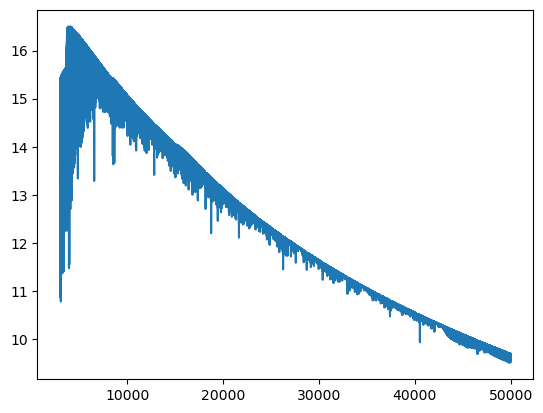

In [10]:
# interpolate with a fixed function throughout
y_dash
f = interpolate.interp1d(x_dash,y_dash)
#x_after_inter = np.linspace(3000.1,49999.00,420051)
print(len(cf))
#cf.remove(3000)
print('x_dash ',x_dash)
print('cf' ,cf[0],cf[-1])
reqq = x_dash[0]
diff_array = np.absolute(cf - reqq)
index_min = diff_array.argmin()
print(index_min)
index_max = diff_array.argmax()
print(index_max)
print(len(x_dash))
new_y = f(cf[index_min+1:])
plt.plot(cf[index_min+1:index_max+1],np.log(new_y))
#plt.plot()

# Convolution and plotting

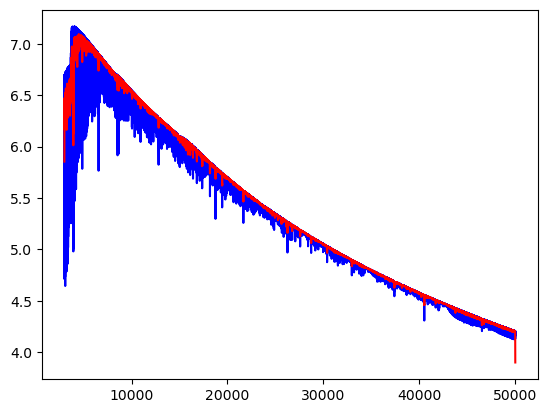

In [11]:
convolved_curve = np.convolve(new_y, final_kernel, mode='same')
plt.plot(x_dash,np.log10(y_dash),'b',cf[index_min:index_max],np.log10(convolved_curve),'r')